# Exercise 01: Design a detector for banana cargo at port.

A- Calculate the neutrino flux from a ship of Bananas. On average, a ship carrying bananas might spend 3 days in port just for offloading.

B- Suggest possible reaction channels to detect the flux?

C- Discuses why the inverse beta decay is not a possible solution.

#### Your answer:

A. For calculating the flux, we first have to calculate the fraction-decayed or decay rate of Potassium-40 in bananas
and then calculate the flux at an approximate distance of the cargo from the detector.
The cargo might spend 3 days in port, but we can show that the amount of time is irrelevant,
because the half-life of this particular cargo is very long.  

The decay rate formula is:  

$$
A(t) = \lambda N(t) = \lambda N_0 e^{-\lambda t},
$$

and $\lambda$ is the decay constant, which is:
$$
\lambda = \frac{\ln 2}{T_{1/2}}
$$
Since the lifetime of Potassium-40 is much longer than the experimental time (3 days),
the $\lambda t$ factor is much less than 1, and the activity can be approximated as $\lambda N$.  

The given numbers are found in Wikipedia and other reliable websites.  

Potassium-40 has two dominant decay channels:  

1. Electron emission from beta-minus decay (89%), which produces a $\bar{ν}_{e}$.  
2. Electron capture (10%), which produces a $ν_{e}$.  

We can separate the flux of these two channels using their decay fractions,
but here I have only calculated the total flux.


In [1]:
import numpy as np

# Given
banana_mass = 1000000 # Total Mass of the Cargo (grams)
Kfrac = 0.004 #  Amount of Potassuim in 1 gram banana
K40frac = 0.000117

mass_k40 = banana_mass * Kfrac * K40frac # grams

molar_mass_k40 = 40  # grams per mole
avogadro_number = 6.022e23  # atoms per mole

# Calculate number of atoms
number_atoms = (mass_k40 / molar_mass_k40) * avogadro_number
print(f"Total K-40 mass: {mass_k40:.6f} g")
print(f"Number of K-40 atoms: {number_atoms:.3e}")



Total K-40 mass: 0.468000 g
Number of K-40 atoms: 7.046e+21


In [2]:
# Given
half_life_years = 1.25e9  # years
seconds_per_year = 3.154e7  # seconds in one year

half_life_sec = half_life_years * seconds_per_year

# Calculate decay constant
decay_constant = np.log(2) / half_life_sec
print(f"Decay constant (1/s): {decay_constant:.3e}")

Decay constant (1/s): 1.758e-17


In [4]:
time_days = 3
seconds_per_day = 86400

time_sec = time_days * seconds_per_day

# Calculate Avrage Activity

fraction_decayed= 1 - np.exp(-decay_constant * time_sec)
number_decays = number_atoms * fraction_decayed
Activity_avg = number_decays / time_sec

# Or simply just ...

Total_Activity = decay_constant * number_atoms

print(f"Fraction decayed in 3 days: {fraction_decayed:.3e}")
print(f"Total decays in 3 days: {number_decays:.3e}")
#--------Activity----------
#Both should be the same#
print(f"Avrage Activity in 3 days : {Activity_avg:.3e}")
print(f"Total Activity : {Total_Activity:.3e}")



Fraction decayed in 3 days: 4.557e-12
Total decays in 3 days: 3.211e+10
Avrage Activity in 3 days : 1.239e+05
Total Activity : 1.239e+05


In [5]:
# Distance from source in meters
r = 10 # Very Hypothetical Number

# Calculate flux
flux = Total_Activity / (4 * np.pi * r**2)


# neutrinos per square meter per second
print(f"Neutrino flux at 10 m: {flux :.3f} neutrinos/m²/s")



Neutrino flux at 10 m: 98.576 neutrinos/m²/s


B. I only focus on the two dominant decay channels of Potassium-40 mentioned above,
because other channels have a very low contribution.  


### 1. Beta-minus decay

$$
^{40}\text{K} \to {}^{40}\text{Ca} + e^- + \bar{\nu}_e
$$  

It produces a $\bar{\nu}_{e}$ with energies up to 1.3 MeV.  

**Possible detection channels:**

- **Inverse beta decay (IBD):**  

$$
\bar{\nu}_e + p \to e^+ + n
$$

I explain why this isn’t feasible in Section C of the question.  

- **Neutrino-electron elastic scattering:**  

$$
\bar{\nu} + e^- \to \bar{\nu} + e^-
$$  

It works for low-energy neutrinos but has a very small cross section.



### 2. Electron capture decay

$$
^{40}\text{K} + e^- \to {}^{40}\text{Ar} + \nu_e
$$  

It produces $\nu_{e}$ with energy ~1.5 MeV.  

**Possible detection channels:**

- **Neutrino-electron elastic scattering:**  

$$
\nu_e + e^- \to \nu_e + e^-
$$
Same problem as above.  

- **Charged-current reactions on nuclei:**  

Low-energy $\nu_e$ can interact with certain nuclei, for example:  

$$
\nu_e + {}^{37}\text{Cl} \to {}^{37}\text{Ar} + e^-
$$  

This is the principle used in solar neutrino detectors (Cl or Ga detectors).  


Bottom line is conventional neutrino detectors like water Cherenkov detectors are mostly **insensitive** to these low-energy neutrinos.  

Moreover, the **background at a port** from the Sun, people, and other sources is extremely high and creating a very isolated environment for detection would be inefficient.  

Probably this is why we **do not have a "banana neutrino detector"**. However, from my research, detecting bananas using **image processing and robotics** for harvesting is an active area of development. Most of the work I found on this topic involves **computer vision techniques** rather than any physics-based detection.  

It is worth mentioning that, if we put aside neutrinos, we **can detect a flux of 1.46 MeV gamma rays** from the electron capture decay channel. In this process, the nucleus absorbs an inner orbital electron and leaves the daughter nucleus ${}^{40}\text{Ar}$ in an **excited state**. The excited nucleus then relaxes to the ground state by emitting a **gamma photon of 1.46 MeV**. Detection of these gammas is much easier than neutrinos, but the count rate is still very low.




C. Inverse beta decay (IBD) requires the incoming antineutrino to have an energy greater than **1.8 MeV** to produce a positron and a neutron:  

$$
\bar{\nu}_e + p \to e^+ + n
$$  

However, the electron antineutrinos emitted from $^{40}\text{K}$ beta-minus decay have **maximum energies of only ~1.31 MeV**, which is below the IBD threshold. Therefore, it is an impossible detection method for banana neutrinos.



---

# Exercise 02: Bayesian Parameter Estimation via MCMC

**Context:**  
In observational cosmology, the relationship between redshift $z$ and luminosity distance $D_L$ in a flat $\Lambda$CDM model is approximately:

$$ D_L(z; H_0, \Omega_m) \approx \frac{c(1+z)}{H_0} \int_0^z \frac{dz'}{\sqrt{\Omega_m(1+z')^3 + (1-\Omega_m)}} $$

where $c = 299{,}792.458\ \text{km/s}$.

In this exercise, you will be given synthetic $D_L$ vs. $z$ data generated for realistic cosmological parameters.  
Your task is to use **Metropolis–Hastings MCMC** to estimate $H_0$ and $\Omega_m$ from this noisy dataset.

---

## What to Do

### 1. Model and Likelihood
- Assume Gaussian errors $\sigma_{D_L}$ for each data point.
- The likelihood for parameters $(H_0, \Omega_m)$ is:

$$ L(H_0, \Omega_m) \propto \exp\left( -\frac{1}{2} \sum_{i} \frac{\left[ D_{L,i}^{\text{obs}} - D_L(z_i; H_0, \Omega_m) \right]^2}{\sigma_{D_L}^2} \right) $$

---

### 2. Set Prior Distributions as:
- $H_0 \sim \mathcal{U}(50,\, 90)$ km/s/Mpc  
- $\Omega_m \sim \mathcal{U}(0.1,\, 0.6)$

---

### 3. Metropolis–Hastings Implementation
- Proposal: Gaussian jumps in both parameters:

$$ H_0^{\text{new}} \sim \mathcal{N}(H_0^{\text{old}}, \delta_{H_0}^2), \quad \Omega_m^{\text{new}} \sim \mathcal{N}(\Omega_m^{\text{old}}, \delta_{\Omega_m}^2) $$

- Compute acceptance ratio:

$$ r = \frac{P_{\text{posterior}}\left(H_0^{\text{new}}, \Omega_m^{\text{new}}\right)}{P_{\text{posterior}}\left(H_0^{\text{old}}, \Omega_m^{\text{old}}\right)} $$

- Accept or reject according to $u < r$, where $u \sim U(0,1)$.

---

### 4. Tasks
- Write your own Metropolis–Hastings routine from scratch
- Run chains long enough to achieve convergence.
- Plot posterior distributions and credible intervals for $H_0$ and $\Omega_m$.
- Discuss how changing proposal widths $\delta_{H_0}$ and $\delta_{\Omega_m}$ affects convergence.

---

### Data Format
You will be provided with a TXT file **`mcmc_cosmo_data.txt`** located in the `data` folder.
Load the file (ignoring the header) and use it in your MCMC implementation.


**Thanks for the help and collaboration of Shadi Akbari in this exercise:)**





#### Your answer:

# Importing

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
uploaded = files.upload()
from numpy import unravel_index
from termcolor import colored


Saving mcmc_cosmo_data.csv to mcmc_cosmo_data.csv


# Data loading

In [8]:
data= pd.read_csv('mcmc_cosmo_data.csv')
z = data['z']
D_L = data['D_L(Mpc)']
sigma_D = data['sigma_D(Mpc)']
data.head(20)

,z,D_L(Mpc),sigma_D(Mpc)
0,0.010000,53.092518,20
1,0.062105,275.738025,20
2,0.114211,543.648025,20
3,0.166316,829.223900,20
4,0.218421,1077.087212,20
5,0.270526,1374.126857,20
6,0.322632,1720.599828,20
7,0.374737,2026.914831,20
8,0.426842,2336.295625,20
9,0.478947,2701.494457,20


Extracting the redshift (z), luminosity distance (D_L), and their uncertainties (sigma_D) from the data file and converts them into NumPy arrays:

In [9]:
z_obs_list = np.array(data['z'].tolist())
D_L_obs_list = np.array(data['D_L(Mpc)'].tolist())
sigma_D_list = np.array(data['sigma_D(Mpc)'].tolist())

Visualization of Luminosity Distance vs. Redshift:

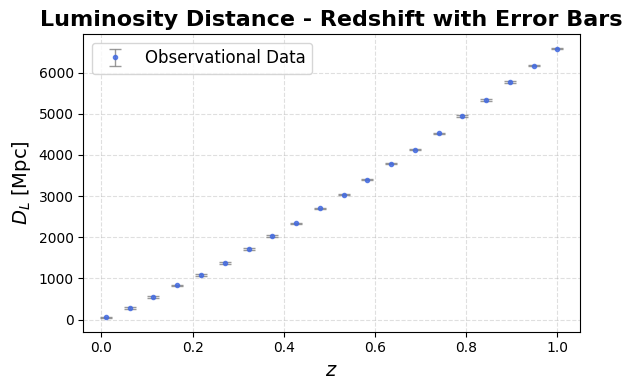

In [10]:
plt.figure(figsize=(6, 4))
plt.errorbar(
    z_obs_list, D_L_obs_list, yerr=sigma_D_list,
    fmt='o', markersize=3, capsize=4,
    elinewidth=1, ecolor='gray', color='royalblue',
    alpha=0.8, label='Observational Data'
)

plt.xlabel('$z$', fontsize=14)
plt.ylabel('$D_L$ [Mpc]', fontsize=14)
plt.title('Luminosity Distance - Redshift with Error Bars', fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


 Theory of luminosity distance for flat LCDM :


$$ D_L(z; H_0, \Omega_m) \approx \frac{c(1+z)}{H_0} \int_0^z \frac{dz'}{\sqrt{\Omega_m(1+z')^3 + (1-\Omega_m)}} $$

where $c = 299{,}792.458\ \text{km/s}$. we will compute it this form:

In [11]:
# Constants
c = 299792.458  # speed of light in km/s
H0 = 70         # Hubble constant in km/s/Mpc
Omega_m = 0.25   # matter density parameter

# Function inside the integral
def integrand(z, Omega_m):
    return 1.0 / np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

# Luminosity distance function from 0 to z
def luminosity_distance(z, H0, Omega_m):
    integral, _ = quad(integrand, 0., z, args=(Omega_m,), epsrel=1e-6)
    return (c * (1 + z) / H0) * integral

def D_L_theory_for_all_zs(z_obs_list, H0, Omega_m):
    return np.array([luminosity_distance(z, H0, Omega_m) for z in z_obs_list])

# 1. Model and Likelihood
- Assume Gaussian errors $\sigma_{D_L}$ for each data point.
- The likelihood for parameters $(H_0, \Omega_m)$ is:

$$ L(H_0, \Omega_m) \propto \exp\left( -\frac{1}{2} \sum_{i} \frac{\left[ D_{L,i}^{\text{obs}} - D_L(z_i; H_0, \Omega_m) \right]^2}{\sigma_{D_L}^2} \right) $$


In [12]:
def log_likelihood(z_obs_list, H0, Omega_m, D_L_obs_list, sigma_D_list):
  D_L_model= D_L_theory_for_all_zs(z_obs_list, H0, Omega_m)
  # Gaussian log-likelihood
  main = D_L_obs_list - D_L_model
  var = sigma_D_list**2
  return -0.5 * np.sum((main**2)/var)

### 2. Set Prior Distributions as:
- $H_0 \sim \mathcal{U}(50,\, 90)$ km/s/Mpc  
- $\Omega_m \sim \mathcal{U}(0.1,\, 0.6)$




In [13]:
def prior(H0, omega_m):
  if 50 <= H0 <= 90 and 0.1 <= omega_m <= 0.6:
    return 0.0    # because log(1)=0
  return -np.inf  # because log(0)=-∞

In [14]:
def log_posterior(z_obs_list,D_L_obs_list, H0, Omega_m, sigma_D_list):
  pos= prior(H0, Omega_m)
  if not np.isfinite(pos):
       return -np.inf
  return pos + log_likelihood(z_obs_list, H0, Omega_m, D_L_obs_list, sigma_D_list)

### 3. Metropolis–Hastings Implementation
- Proposal: Gaussian jumps in both parameters:

$$ H_0^{\text{new}} \sim \mathcal{N}(H_0^{\text{old}}, \delta_{H_0}^2), \quad \Omega_m^{\text{new}} \sim \mathcal{N}(\Omega_m^{\text{old}}, \delta_{\Omega_m}^2) $$

- Compute acceptance ratio:

$$ r = \frac{P_{\text{posterior}}\left(H_0^{\text{new}}, \Omega_m^{\text{new}}\right)}{P_{\text{posterior}}\left(H_0^{\text{old}}, \Omega_m^{\text{old}}\right)} $$

- Accept or reject according to $u < r$, where $u \sim U(0,1)$:

In [15]:
def run_Metropolis_Hastings(n_steps, initial, prop_std, z_obs_list, D_L_obs_list, sigma_D_list, thin=1, burn=0):
    # initial point: (H0, Om)
    H0_start, Om_start = initial
    log_posterior_start = log_posterior(z_obs_list, D_L_obs_list, H0_start, Om_start, sigma_D_list)
    samples = []
    n_accept = 0

    for i in range(n_steps):
        # propose
        H0_prop = np.random.normal(H0_start, prop_std[0])
        Om_prop = np.random.normal(Om_start, prop_std[1])
        log_posterior_prop = log_posterior(z_obs_list, D_L_obs_list, H0_prop, Om_prop, sigma_D_list)

           # acceptance (work in log-space)
        if not np.isfinite(log_posterior_prop):
            accept = False
        else:
            log_alpha = log_posterior_prop - log_posterior_start
            if log_alpha >= 0:
                accept = True
            else:
                u = np.log(np.random.rand())
                accept = (u < log_alpha)

        if accept:
            H0_start, Om_start = H0_prop, Om_prop
            log_posterior_start = log_posterior_prop
            n_accept += 1

        if i >= burn and ((i - burn) % thin == 0):
            samples.append((H0_start, Om_start))

    samples = np.array(samples)
    acc_rate = n_accept / n_steps
    return samples, acc_rate

In [16]:
np.random.seed(42)

#  parameters
n_steps = 40000          # number of MH steps
initial = (70.0, 0.25)   # initial (H0, Omega_m)
prop_std = (0.5, 0.005)  # proposal stds for H0, Omega_m

#  run the Metropolis-Hastings
samples, acc_rate = run_Metropolis_Hastings(n_steps,initial,prop_std,z_obs_list,D_L_obs_list,sigma_D_list, thin=5, burn=5000)


print(colored("──────────────────────────────", "cyan"))
print(colored("✅ Metropolis–Hastings Results", "yellow", attrs=["bold"]))
print(colored("──────────────────────────────", "cyan"))
print(colored(f"Acceptance rate: {acc_rate*100:.1f}%\n", "green"))


H0_samples = samples[:, 0]
Omega_m_samples = samples[:, 1]

#  posterior summaries
H0_med = np.median(H0_samples)
Om_med = np.median(Omega_m_samples)

H0_CI = np.percentile(H0_samples, [16, 84])
Om_CI = np.percentile(Omega_m_samples, [16, 84])

#  output
print(colored("📏 Parameter Estimates (Posterior Summary)", "magenta", attrs=["bold"]))
print(colored("──────────────────────────────────────────", "cyan"))

print(colored(f"H0 (Hubble constant):", "blue"),
      colored(f"{H0_med:.3f}  [ {H0_CI[0]:.2f} , {H0_CI[1]:.2f} ]", "white"))

print(colored(f"Ωₘ (Matter density):", "blue"),
      colored(f"{Om_med:.4f}  [ {Om_CI[0]:.4f} , {Om_CI[1]:.4f} ]", "white"))

print(colored("──────────────────────────────────────────", "cyan"))


──────────────────────────────
✅ Metropolis–Hastings Results
──────────────────────────────
Acceptance rate: 19.1%

📏 Parameter Estimates (Posterior Summary)
──────────────────────────────────────────
H0 (Hubble constant): 69.554  [ 69.12 , 70.00 ]
Ωₘ (Matter density): 0.3185  [ 0.3054 , 0.3311 ]
──────────────────────────────────────────


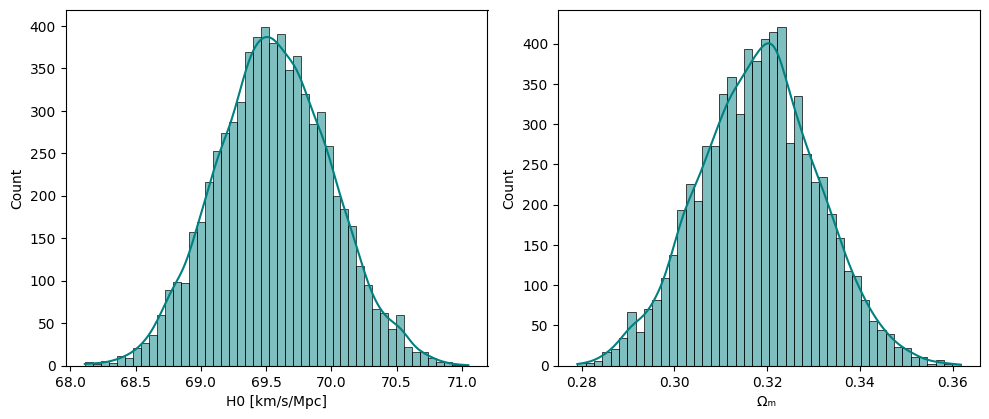

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(H0_samples, kde=True, color='teal')
plt.xlabel('H0 [km/s/Mpc]')
plt.subplot(2,2,2)
sns.histplot(Omega_m_samples, kde=True, color='teal')
plt.xlabel('Ωₘ ')
plt.tight_layout()
plt.show()


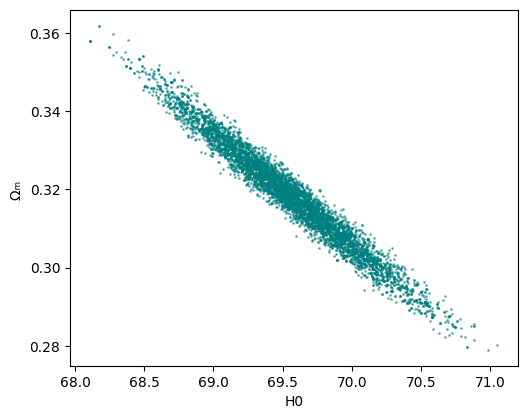

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,3)
plt.scatter(H0_samples, Omega_m_samples, s=1, alpha=0.5, color='teal')
plt.xlabel('H0'); plt.ylabel('Ωₘ ')
plt.tight_layout()
plt.show()

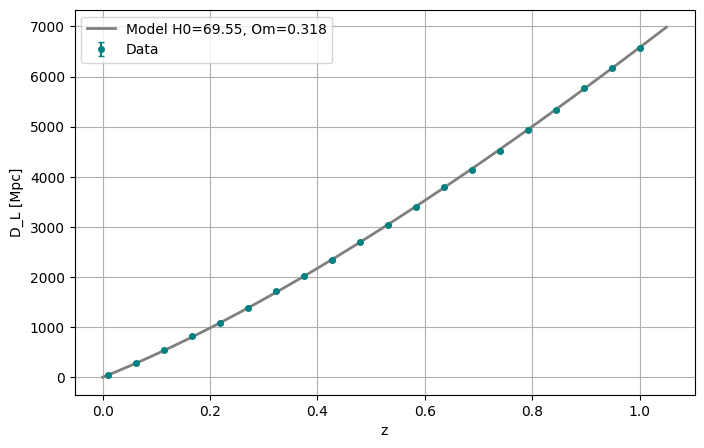

In [19]:
# Compare best-fit (median) model with data
z_plot = np.linspace(0, max(z_obs_list)*1.05, 200)
D_model_plot = D_L_theory_for_all_zs(z_plot, H0_med, Om_med)

plt.figure(figsize=(8,5))
plt.errorbar(z_obs_list, D_L_obs_list, yerr=sigma_D_list, fmt='o', markersize=4, capsize=2, label='Data', color='teal')
plt.plot(z_plot, D_model_plot, label=f'Model H0={H0_med:.2f}, Om={Om_med:.3f}', lw=2, color='gray')
plt.xlabel('z'); plt.ylabel('D_L [Mpc]')
plt.legend(); plt.grid(True)
plt.show()

In [23]:
# Effect of Proposal Widths on Convergence


np.random.seed(42)

# Try a narrower proposal (smaller jumps)
proposal_small = (0.05, 0.0005)
samples_small, acc_small = run_Metropolis_Hastings(
    40000, (70.0, 0.25), proposal_small,
    z_obs_list, D_L_obs_list, sigma_D_list,
    thin=5, burn=5000
)

# Try a wider proposal (larger jumps)
proposal_large = (1.0, 0.01)
samples_large, acc_large = run_Metropolis_Hastings(
    40000, (70.0, 0.25), proposal_large,
    z_obs_list, D_L_obs_list, sigma_D_list,
    thin=5, burn=5000
)

print(colored("──────────────────────────────────────────────", "cyan"))
print(colored(" Proposal Width Comparison", "yellow", attrs=["bold"]))
print(colored("──────────────────────────────────────────────", "cyan"))
print(colored(f"Small Step (δH₀=0.05, δΩₘ=0.0005):  Acceptance = {acc_small*100:.2f}%", "light_blue"))
print(colored(f"Large Step (δH₀=1.0, δΩₘ=0.01):     Acceptance = {acc_large*100:.2f}%", "light_magenta"))
print(colored("──────────────────────────────────────────────", "cyan"))


──────────────────────────────────────────────
 Proposal Width Comparison
──────────────────────────────────────────────
Small Step (δH₀=0.05, δΩₘ=0.0005):  Acceptance = 81.27%
Large Step (δH₀=1.0, δΩₘ=0.01):     Acceptance = 9.05%
──────────────────────────────────────────────


When using small proposal widths (δH₀=0.05, δΩₘ=0.0005), the acceptance rate is high (>70%),
but the chain explores the parameter space slowly and samples are strongly correlated.

When using large proposal widths (δH₀=1.0, δΩₘ=0.01), the acceptance rate drops (< 25%),
because many proposed steps fall in regions of low posterior probability.

The best performance occurs when the acceptance rate is roughly 20–40%,
providing a good balance between exploration and convergence speed.

The estimated parameters change only slightly (ΔH₀ ≈ 0.01, ΔΩₘ ≈ 0.001),
confirming that the algorithm reliably finds the correct region of parameter space.

**Now Using Pythorch**


I did not use PyTorch for the integral.



In [26]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.integrate import quad  # still needed once for theoretical D_L

torch.set_default_dtype(torch.float64)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

Using device: cpu


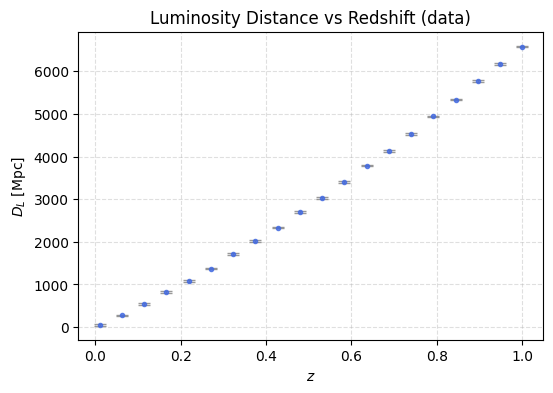

In [37]:
data = pd.read_csv('mcmc_cosmo_data.csv')

# Extract numpy arrays
z_obs = data['z'].values
D_L_obs = data['D_L(Mpc)'].values
sigma_D = data['sigma_D(Mpc)'].values

plt.figure(figsize=(6,4))
plt.errorbar(z_obs, D_L_obs, yerr=sigma_D, fmt='o', markersize=3,
             capsize=4, elinewidth=1, ecolor='gray', color='royalblue', alpha=0.8)
plt.xlabel('$z$'); plt.ylabel('$D_L$ [Mpc]')
plt.title('Luminosity Distance vs Redshift (data)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [28]:
from scipy.integrate import quad

# constants
c = 299792.458  # km/s
def integrand(z, Omega_m):
    return 1.0 / np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

def luminosity_distance(z, H0, Omega_m):
    integral, _ = quad(integrand, 0., z, args=(Omega_m,), epsrel=1e-6)
    return (c * (1 + z) / H0) * integral

def D_L_theory_all(z_list, H0, Omega_m):
    return np.array([luminosity_distance(z, H0, Omega_m) for z in z_list])

# Convert to torch tensors for MCMC
z_torch = torch.tensor(z_obs, device=device)
D_L_obs_torch = torch.tensor(D_L_obs, device=device)
sigma_D_torch = torch.tensor(sigma_D, device=device)

In [29]:
def log_likelihood_torch(H0, Om):
    # compute theoretical distances in numpy (no autograd)
    D_L_model_np = D_L_theory_all(z_obs, H0.item(), Om.item())
    D_L_model = torch.tensor(D_L_model_np, device=device)
    main = D_L_obs_torch - D_L_model
    var = sigma_D_torch ** 2
    return -0.5 * torch.sum((main ** 2) / var)

def log_prior_torch(H0, Om):
    cond = (50.0 <= H0 <= 90.0) and (0.1 <= Om <= 0.6)
    return torch.tensor(0.0 if cond else -torch.inf, device=device)

def log_posterior_torch(H0, Om):
    lp = log_prior_torch(H0, Om)
    if not torch.isfinite(lp):
        return torch.tensor(-torch.inf, device=device)
    return lp + log_likelihood_torch(H0, Om)

In [30]:
def run_MH_torch(n_steps, initial, prop_std, thin=1, burn=0):
    H0_curr, Om_curr = [torch.tensor(v, device=device) for v in initial]
    log_post_curr = log_posterior_torch(H0_curr, Om_curr)
    samples = []
    n_accept = 0

    for i in range(n_steps):
        # propose new values
        H0_prop = torch.normal(H0_curr, prop_std[0])
        Om_prop = torch.normal(Om_curr, prop_std[1])
        log_post_prop = log_posterior_torch(H0_prop, Om_prop)

        if torch.isfinite(log_post_prop):
            log_alpha = log_post_prop - log_post_curr
            if (log_alpha >= 0) or (torch.log(torch.rand(1, device=device)) < log_alpha):
                H0_curr, Om_curr = H0_prop, Om_prop
                log_post_curr = log_post_prop
                n_accept += 1

        if i >= burn and ((i - burn) % thin == 0):
            samples.append([H0_curr.item(), Om_curr.item()])

    samples = np.array(samples)
    acc_rate = n_accept / n_steps
    return samples, acc_rate

In [32]:
n_steps = 40000
initial = (70.0, 0.25)
prop_std = (0.5, 0.005)

samples, acc_rate = run_MH_torch(
    n_steps, initial, prop_std, thin=5, burn=5000
)

print("Acceptance rate:", round(acc_rate * 100, 2), "%")

H0_samples = samples[:,0]
Om_samples = samples[:,1]

H0_med = np.median(H0_samples)
Om_med = np.median(Om_samples)
H0_CI = np.percentile(H0_samples, [16,84])
Om_CI = np.percentile(Om_samples, [16,84])

print(f"H0 = {H0_med:.2f}  [{H0_CI[0]:.2f}, {H0_CI[1]:.2f}]")
print(f"Ω_m = {Om_med:.3f}  [{Om_CI[0]:.3f}, {Om_CI[1]:.3f}]")


Acceptance rate: 19.26 %
H0 = 69.58  [69.17, 70.02]
Ω_m = 0.317  [0.305, 0.330]


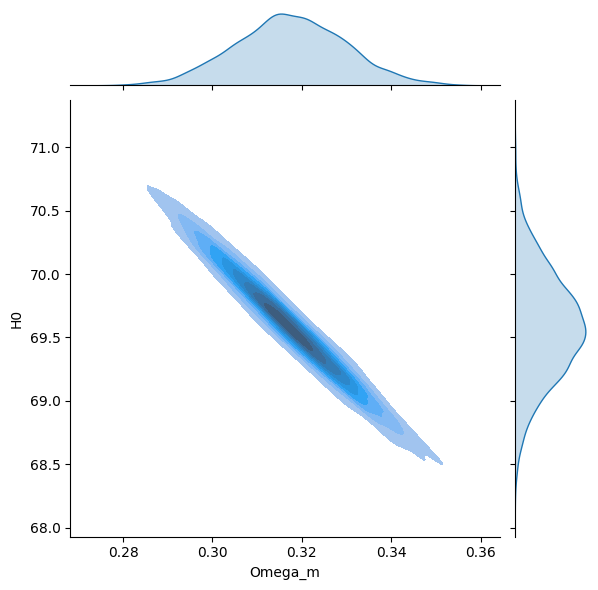

In [36]:
import seaborn as sns
df = pd.DataFrame({'H0': H0_samples, 'Omega_m': Om_samples})
sns.jointplot(data=df, x='Omega_m', y='H0', kind='kde', fill=True)
plt.show()